In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
nba = pd.read_csv("nba_2013.csv")
rowsNBA, columnsNBA = nba.shape
nba = nba.dropna()
# print(nba.head(3))
# cols = ['player','pos','g','pts','fg.','ft.']

In [3]:
point_guards = nba[nba['pos'] == 'PG'].copy()

point_guards['Cluster']=-1

# print(dir(point_guards))

# print(point_guards.head(3)) 

# point_guards

In [4]:
point_guards = point_guards[point_guards['g'] != 0]

point_guards['ppg'] = point_guards['pts'] / point_guards['g']

point_guards[['pts', 'g', 'ppg','Cluster']].head(5)

,pts,g,ppg,Cluster
24,930,71,13.098592,-1
29,150,20,7.500000,-1
30,660,79,8.354430,-1
38,666,72,9.250000,-1
50,378,55,6.872727,-1


In [5]:
point_guards = point_guards[point_guards['tov'] != 0]

point_guards['atr'] = point_guards['ast'] / point_guards['tov']

point_guards[['ast', 'tov', 'atr']].head(5)

,ast,tov,atr
24,313,125,2.504000
29,32,19,1.684211
30,303,125,2.424000
38,194,82,2.365854
50,307,102,3.009804


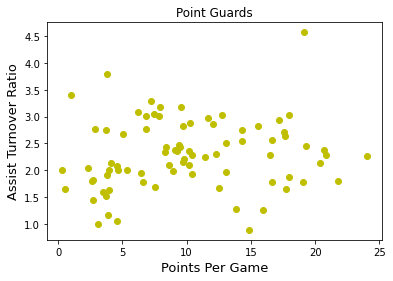

In [6]:
point_guards = point_guards.dropna(subset=['ppg', 'atr'])
plt.scatter(point_guards['ppg'], point_guards['atr'], c='y')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()



In [7]:
num_clusters = 5
# Use numpy's random function to generate a list, length: num_clusters, of indices
# random_initial_points = np.random.choice(point_guards.index, size=num_clusters)
random_initial_points = [0,1,2,3,4]
# print(random_initial_points)
# Use the random indices to create the centroids
# centroids = point_guards.loc[random_initial_points]
centroids = point_guards.iloc[random_initial_points]
print((centroids))
print(centroids.iloc[0]['player'])

print(point_guards.index[point_guards['player'] == centroids.iloc[0]['player']].tolist())


             player pos  age bref_team_id   g  gs    mp   fg  fga    fg.  ...  \
24    D.J. Augustin  PG   26          TOT  71   9  1939  298  718  0.415  ...   
29  Leandro Barbosa  PG   31          PHO  20   0   368   56  131  0.427  ...   
30       Jose Barea  PG   29          MIN  79   1  1471  254  656  0.387  ...   
38   Jerryd Bayless  PG   25          TOT  72  19  1686  248  617  0.402  ...   
50      Steve Blake  PG   33          TOT  55  28  1498  133  353  0.377  ...   

    stl  blk  tov   pf  pts     season  season_end  Cluster        ppg  \
24   53    3  125  147  930  2013-2014        2013       -1  13.098592   
29    7    4   19   30  150  2013-2014        2013       -1   7.500000   
30   26    0  125  129  660  2013-2014        2013       -1   8.354430   
38   60    9   82  161  666  2013-2014        2013       -1   9.250000   
50   54    8  102   85  378  2013-2014        2013       -1   6.872727   

         atr  
24  2.504000  
29  1.684211  
30  2.424000  
38  2.36

In [8]:
#First, we need to calculate the clusters based on the euclidean distances
#Second, calculate the new centroids as the center of the clusters

def clustering(centroids):
    
#     point_guards['Cluster']=-1

    for i in range(5):  
#     for i in range(len(point_guards)):
        minDistance = None
        cluster = None
        for c in range(len(centroids)):
            distance = euclidean_distances((point_guards.iloc[i][['atr','ppg']]).values.reshape(1, -1), (centroids.iloc[c][['atr','ppg']]).values.reshape(1, -1))
#             print(distance)
            if minDistance == None or distance < minDistance:
                minDistance = distance
                cluster = c
            if cluster != None:
                print(cluster)
                new_column = pd.Series([cluster],name = 'Cluster', index = [i])
                point_guards.update(new_column)
        print(cluster)
    
    print(point_guards.head())
    return point_guards
        

# def centroiding(centroids):
#     newCentroids 
#     for i in clusters:
#         centroids.append(centroid(clusters[i]))
#     return newCentroids

# centroids = point_guards.loc[random_initial_points]

# def centroid(cluster):
    
#     return centroid
point_guards = clustering(centroids)
print(point_guards['Cluster'].value_counts())
print(point_guards.head())
# print(point_guards['Cluster'].unique())

# centroids = centroiding(clustering)

0
0
0
0
0
0
0
1
1
1
1
1
0
1
2
2
2
2
0
1
2
3
3
3
0
1
1
1
4
4
             player pos  age bref_team_id   g  gs    mp   fg  fga    fg.  ...  \
24    D.J. Augustin  PG   26          TOT  71   9  1939  298  718  0.415  ...   
29  Leandro Barbosa  PG   31          PHO  20   0   368   56  131  0.427  ...   
30       Jose Barea  PG   29          MIN  79   1  1471  254  656  0.387  ...   
38   Jerryd Bayless  PG   25          TOT  72  19  1686  248  617  0.402  ...   
50      Steve Blake  PG   33          TOT  55  28  1498  133  353  0.377  ...   

    stl  blk  tov   pf  pts     season  season_end  Cluster        ppg  \
24   53    3  125  147  930  2013-2014        2013       -1  13.098592   
29    7    4   19   30  150  2013-2014        2013       -1   7.500000   
30   26    0  125  129  660  2013-2014        2013       -1   8.354430   
38   60    9   82  161  666  2013-2014        2013       -1   9.250000   
50   54    8  102   85  378  2013-2014        2013       -1   6.872727   

        

Series([], Name: Cluster, dtype: int64)
Empty DataFrame
Columns: [ppg, atr]
Index: []


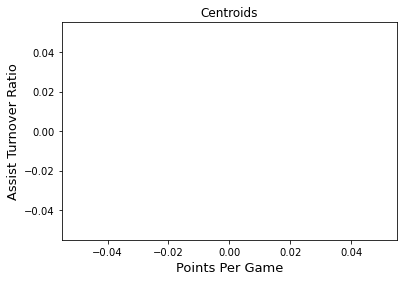

5


In [9]:
colors = ['green','blue','yellow','black','purple']

for i in range(3,4):
    cluster = point_guards[point_guards['Cluster'] == i]
    print(cluster['Cluster'].value_counts())
    print(cluster[['ppg','atr']])
    plt.scatter(cluster['ppg'], cluster['atr'], c=colors[i])
# plt.scatter(point_guards['ppg'], point_guards['atr'], c=colors[0])
# plt.scatter(centroids['ppg'], centroids['atr'], c='red')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()
print(len(centroids))

In [10]:
df = pd.DataFrame({'A': ['a', 'b', 'c'],
                   'B': ['x', 'y', 'z']})
new_column = pd.Series(['d', 'e'], name='B', index=[0, 2])
df.update(new_column)
df

,A,B
0,a,d
1,b,y
2,c,e


In [11]:
import pandas as pd
import numpy as np

nba = pd.read_csv("nba_2013.csv")
nba.head(3)
cols = ['player','pos','g','pts','fg.','ft.']

In [12]:
nba = pd.read_csv("nba_2013.csv")
cols = ['player','pos','g','pts','fg.','ft.']

point_guards = nba[nba['pos'] == 'PG']

print(point_guards.head(3)) 

             player pos  age bref_team_id   g  gs    mp   fg  fga    fg.  ...  \
24    D.J. Augustin  PG   26          TOT  71   9  1939  298  718  0.415  ...   
29  Leandro Barbosa  PG   31          PHO  20   0   368   56  131  0.427  ...   
30       Jose Barea  PG   29          MIN  79   1  1471  254  656  0.387  ...   

    drb  trb  ast  stl  blk  tov   pf  pts     season  season_end  
24  115  130  313   53    3  125  147  930  2013-2014        2013  
29   32   37   32    7    4   19   30  150  2013-2014        2013  
30  138  154  303   26    0  125  129  660  2013-2014        2013  

[3 rows x 31 columns]


In [13]:
point_guards['ppg'] = point_guards['pts'] / point_guards['g']

point_guards[['pts', 'g', 'ppg']].head(5)

<ipython-input-13-760436f72843>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  point_guards['ppg'] = point_guards['pts'] / point_guards['g']


,pts,g,ppg
24,930,71,13.098592
29,150,20,7.500000
30,660,79,8.354430
38,666,72,9.250000
50,378,55,6.872727


In [14]:
point_guards = point_guards[point_guards['tov'] != 0]

point_guards['atr'] = point_guards['ast'] / point_guards['tov']

point_guards[['ast', 'tov', 'atr']].head(5)

,ast,tov,atr
24,313,125,2.504000
29,32,19,1.684211
30,303,125,2.424000
38,194,82,2.365854
50,307,102,3.009804


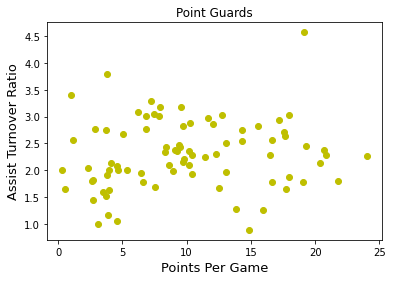

In [15]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='y')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

In [16]:
num_clusters = 5
# Use numpy's random function to generate a list, length: num_clusters, of indices
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)
# Use the random indices to create the centroids
centroids = point_guards.loc[random_initial_points]

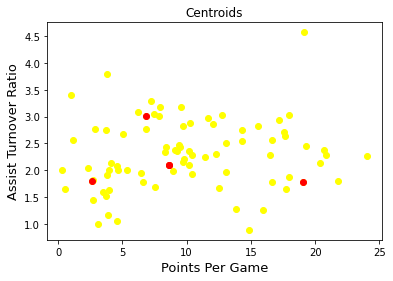

In [17]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='yellow')
plt.scatter(centroids['ppg'], centroids['atr'], c='red')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

In [18]:
def centroids_to_dict(centroids):
    dictionary = dict()
    # iterating counter we use to generate a cluster_id
    counter = 0

    # iterate a pandas data frame row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['atr']]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

centroids_dict = centroids_to_dict(centroids)

In [19]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

q = [5, 2]
p = [3,1]

# Sqrt(5) = ~2.24
print(calculate_distance(q, p))

2.23606797749979


In [20]:
# Add the function, `assign_to_cluster`
# This creates the column, `cluster`, by applying assign_to_cluster row-by-row
# Uncomment when ready

# point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
def assign_to_cluster(row):
    lowest_distance = -1
    closest_cluster = -1
    
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row['ppg'], row['atr']]
        euclidean_distance = calculate_distance(centroid, df_row)
        
        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id 
        elif euclidean_distance < lowest_distance:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

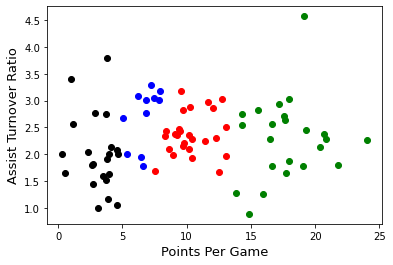

In [21]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()

visualize_clusters(point_guards, 5)

In [22]:
def recalculate_centroids(df):
    new_centroids_dict = dict()
    # 0..1...2...3...4
    for cluster_id in range(0, num_clusters):
        # Finish the logic
        return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)
def recalculate_centroids(df):
    new_centroids_dict = dict()
    
    for cluster_id in range(0, num_clusters):
        values_in_cluster = df[df['cluster'] == cluster_id]
        # Calculate new centroid using mean of values in the cluster
        new_centroid = [np.average(values_in_cluster['ppg']), np.average(values_in_cluster['atr'])]
        new_centroids_dict[cluster_id] = new_centroid
    return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


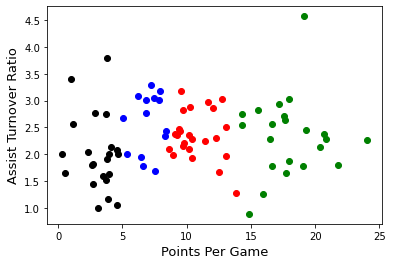

In [23]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


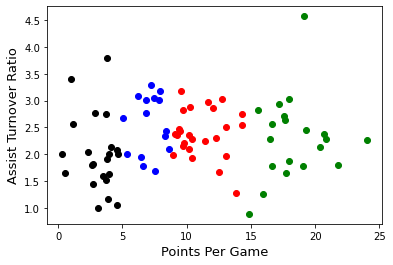

In [24]:
centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

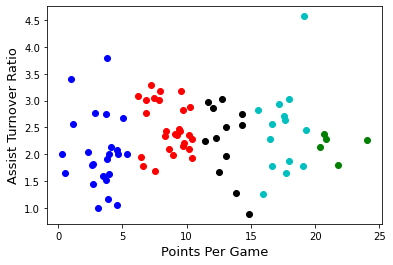

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg', 'atr']])
point_guards['cluster'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)